# First Example

In [1]:
import numpy as np
import pandas as pd
from consensus.schulze_election import combination_ranking, schulze_weight_matrix, schulze_strength_matrix
from consensus.utils import generate_ballots, weight_graph

### Define some voters and candidates

In [4]:
n_voters = 4
n_candidates = 5
voters = ['v{:01d}'.format(i) for i in range(1, n_voters + 1)]
voting_rights = dict(zip(voters, [1.] * len(voters)))
candidates = ['c{:01d}'.format(i) for i in range(1, n_candidates + 1)]

### Specify a ranking using a dictionary keyed by voters of lists of ranks

Each list represents the ballot casted by each voter, i.e., the rank given to the candidates in the specified order. 

A ballot is valid if it fulfills the following two conditions:

* There is at least one candidate $C$ with $\textrm{rank}(C)=1$

* For each candidate $C$:
$$\textrm{rank}(C) = \#\{S\;|\; \textrm{rank}(S) < \textrm{rank}(C)\} + 1$$

When several candidates share the same rank, in particular when all the candidates rank first, it means the voter does not have any preferences among the candidates concerned.

### Let generate a random set of valid ballots

In [5]:
ballots = generate_ballots(voters, candidates)
ballots

{'v1': [4, 1, 3, 1, 4],
 'v2': [1, 2, 5, 4, 2],
 'v3': [2, 5, 2, 2, 1],
 'v4': [1, 4, 4, 1, 1]}

In [6]:
# Hard code the ballots of the example

ballots = {'v1': [1, 3, 4, 4, 2],
           'v2': [3, 3, 3, 1, 1],
           'v3': [2, 1, 4, 2, 5],
           'v4': [3, 1, 1, 3, 3]}

### Alternative instances

For the sake of visualization, we can instantiate the ballots as a data frame:

In [7]:
df_ballots = pd.DataFrame(ballots, columns=voters, index=candidates)
df_ballots

v1  v2  v3  v4
c1   1   3   2   3
c2   3   3   1   1
c3   4   3   4   1
c4   4   1   2   3
c5   2   1   5   3

We can also instantiate the ballots as a dict of dict. For sake of clarity, we will make use of this instance all the way through:

In [8]:
dict_ballots = {v: dict(zip(candidates, l)) for v, l in ballots.items()}
dict_ballots

{'v1': {'c1': 1, 'c2': 3, 'c3': 4, 'c4': 4, 'c5': 2},
 'v2': {'c1': 3, 'c2': 3, 'c3': 3, 'c4': 1, 'c5': 1},
 'v3': {'c1': 2, 'c2': 1, 'c3': 4, 'c4': 2, 'c5': 5},
 'v4': {'c1': 3, 'c2': 1, 'c3': 1, 'c4': 3, 'c5': 3}}

### Combination Ranking

Let's combine the rankings casted by the voters into a consensus ranking, making use of Schulze's voting algorithm:

In [9]:
combination_ranking(dict_ballots, voting_rights)

{'c2': 1, 'c1': 2, 'c4': 2, 'c5': 4, 'c3': 5}

# Weights Graph

Given an arrow of candidates, e.g., $A \to B$, its weight is the number of voters that prefer $A$ over $B$.

Given an instance of ballots, let's compute the directed graph of arrows that give the maximum possible weights between the nodes they connect.

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

networkx_options = {
    'node_color': 'orange',
    'node_size': 1500,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 25,
    'font_size': 20,
}

In [11]:
w_matrix = schulze_weight_matrix(dict_ballots, candidates, voting_rights)
w_matrix

array([[0., 1., 2., 1., 2.],
       [2., 0., 2., 3., 2.],
       [1., 0., 0., 1., 2.],
       [1., 1., 2., 0., 1.],
       [1., 2., 2., 1., 0.]])

In [14]:
G_max, edge_labels_dict_max = weight_graph(w_matrix, candidates)

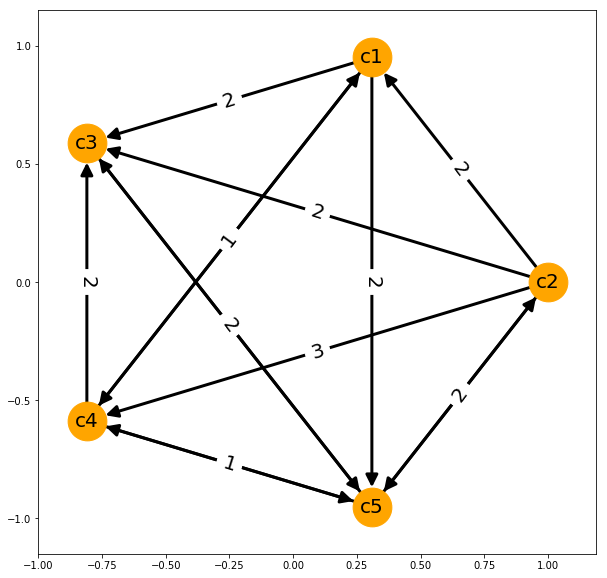

In [15]:
def plot_graph(G, edge_labels_dict, **kwargs):
    fig, ax = plt.subplots(figsize=(10, 10))
    draw_edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G), font_size=20)
    for k in draw_edge_labels:
        draw_edge_labels[k].set_text(str(int(edge_labels_dict[k])))
    nx.draw_networkx(G, pos=nx.circular_layout(G), edge_labels=draw_edge_labels, arrows=True, ax=ax, **kwargs)
    plt.show()

plot_graph(G_max, edge_labels_dict_max, **networkx_options)

In [16]:
G_min, edge_labels_dict_min = weight_graph(w_matrix, candidates, option=-1)

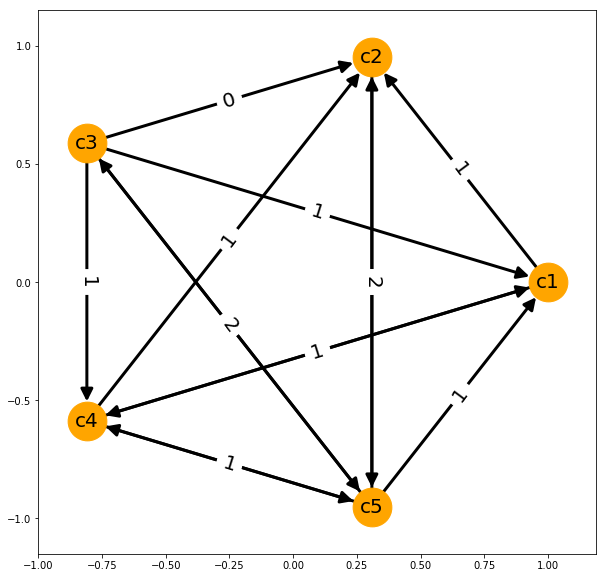

In [17]:
plot_graph(G_min, edge_labels_dict_min, **networkx_options)

# Strengths Graph

In [14]:
s_matrix = schulze_strength_matrix(w_matrix, candidates)
s_matrix

array([[0., 2., 2., 0., 2.],
       [0., 0., 0., 0., 3.],
       [0., 2., 0., 0., 2.],
       [1., 2., 3., 0., 2.],
       [0., 0., 0., 0., 0.]])

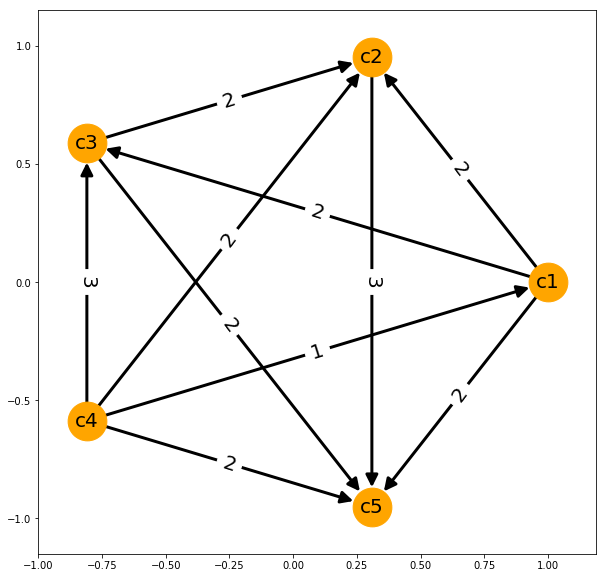

In [17]:
G, edge_labels_dict = max_weight_graph(w_matrix, candidates)
# TODO min_weight_graph
plot_graph(G, edge_labels_dict, **networkx_options)

# Infer voting rights from pool of *fona fide* good candidates